170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 295s 2us/step


E:\DL Projects\DL\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3248 - loss: 1.8638 - val_accuracy: 0.3957 - val_loss: 1.6763
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3974 - loss: 1.6750 - val_accuracy: 0.4218 - val_loss: 1.6191
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4327 - loss: 1.5821 - val_accuracy: 0.4451 - val_loss: 1.5451
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4532 - loss: 1.5258 - val_accuracy: 0.4380 - val_loss: 1.5576
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4690 - loss: 1.4819 - val_accuracy: 0.4599 - val_loss: 1.5072
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4599 - loss: 1.5072
Test accuracy: 45.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


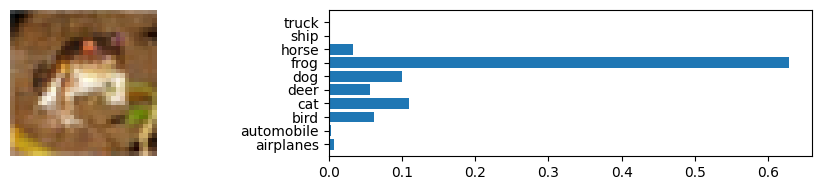

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(xtr,ytr),(xte,yte)=cifar10.load_data()
xtr,xte=xtr/255.0,xte/255.0
ytr,yte=to_categorical(ytr), to_categorical(yte)
model=Sequential([
layers.Flatten(input_shape=(32,32,3)),
layers.Dense(512,'relu'),
layers.Dense(256,'relu'),
layers.Dense(128,'relu'),
layers.Dense(10,'softmax')
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtr,ytr,epochs=5,batch_size=64,validation_data=(xte,yte))
_,acc=model.evaluate(xte,yte)
print("Test accuracy:",round(acc*100,4))
sample_img=xtr[:1]
pred=model.predict(sample_img)
class_lab=['airplanes','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig,axs=plt.subplots(1,2,figsize=(10,2))
axs[0].imshow(sample_img[0])
axs[0].axis('off')
axs[1].barh(class_lab,pred[0])
plt.tight_layout()
plt.show()